# Handwritten digits recognition (using Multilayer Perceptron)

> - 🤖 See [full list of Machine Learning Experiments](https://github.com/trekhleb/machine-learning-experiments) on **GitHub**<br/><br/>
> - ▶️ **Interactive Demo**: [try this model and other machine learning experiments in action](https://trekhleb.github.io/machine-learning-experiments/)

## Experiment overview

In this experiment we will build a [Multilayer Perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) (MLP) model using [Tensorflow](https://www.tensorflow.org/) to recognize handwritten digits.

A **multilayer perceptron** (MLP) is a class of feedforward artificial neural network. An MLP consists of, at least, three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

![digits_recognition_mlp.png](../../demos/src/images/digits_recognition_mlp.png)

## Import dependencies

- [tensorflow](https://www.tensorflow.org/) - for developing and training ML models.
- [matplotlib](https://matplotlib.org/) - for plotting the data.
- [seaborn](https://seaborn.pydata.org/index.html) - for plotting confusion matrix.
- [numpy](https://numpy.org/) - for linear algebra operations.
- [pandas](https://pandas.pydata.org/) - for displaying training/test data in a table.
- [math](https://docs.python.org/3/library/math.html) - for calculating square roots etc.
- [datetime](https://docs.python.org/3.8/library/datetime.html) - for generating a logs folder names.

In [2]:
# Selecting Tensorflow version v2 (the command is relevant for Colab only).
# %tensorflow_version 2.x

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform
import keras

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', keras.__version__)

Python version: 3.12.3
Tensorflow version: 2.16.1
Keras version: 3.2.1


## Configuring Tensorboard

We will use [Tensorboard](https://www.tensorflow.org/tensorboard) to debug the model later.

In [4]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

In [5]:
# Clear any logs from previous runs.
!rm -rf ./.logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


## Load the data

The **training** dataset consists of 60000 28x28px images of hand-written digits from `0` to `9`.

The **test** dataset consists of 10000 28x28px images.

In [6]:
mnist_dataset = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [7]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


## Explore the data

Here is how each image in the dataset looks like. It is a 28x28 matrix of integers (from `0` to `255`). Each integer represents a color of a pixel.

In [8]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


This matrix of numbers may be drawn as follows: 

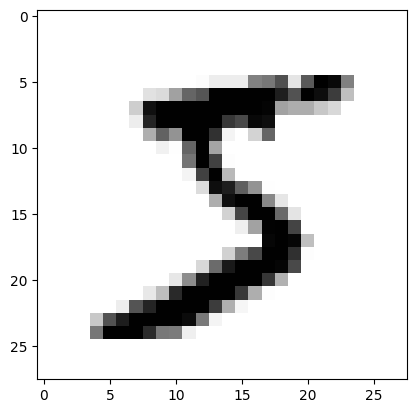

In [9]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

Let's print some more training examples to get the feeling of how the digits were written.

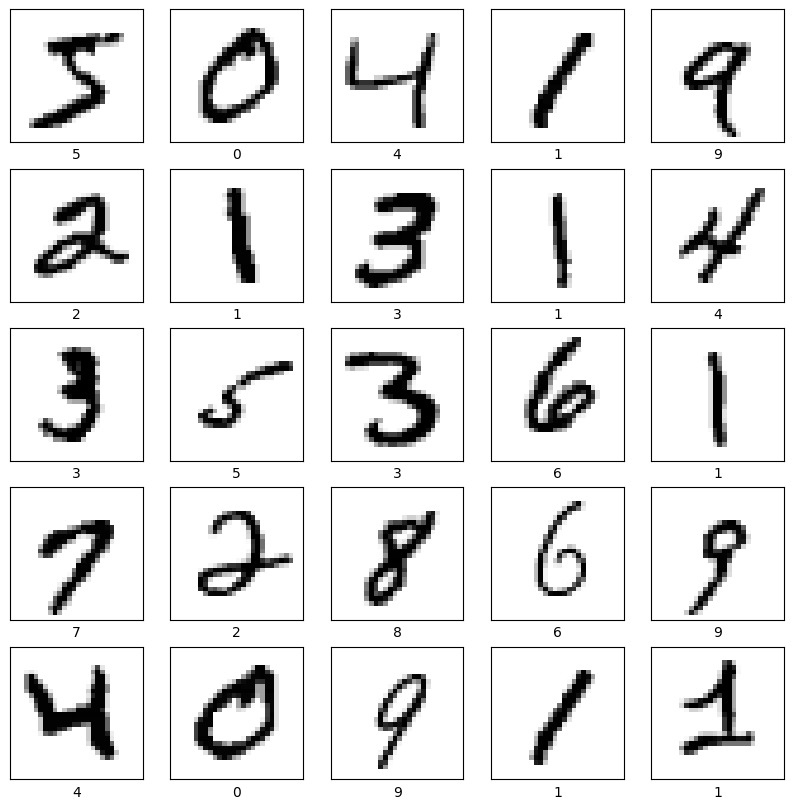

In [10]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Normalize the data

Here we're just trying to move from values range of `[0...255]` to `[0...1]`.

In [11]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

In [12]:
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(pd.DataFrame(x_train_normalized[0]))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.69,0.10,0.65,1.00,0.97,0.50,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.14,...,0.88,0.67,0.99,0.95,0.76,0.25,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.93,0.99,...,0.36,0.32,0.32,0.22,0.15,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.86,0.99,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.61,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Let's see how the digits look like after normalization. We're expecting it to look similar to original.

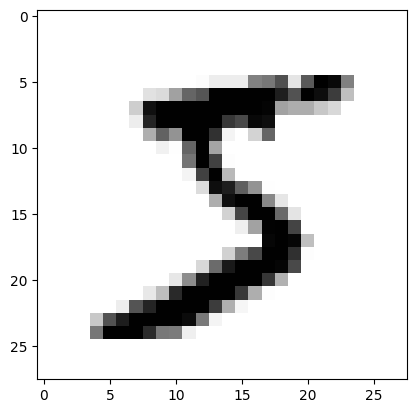

In [13]:
plt.imshow(x_train_normalized[0], cmap=plt.cm.binary)
plt.show()

## Build the model

We will use [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) Keras model with 4 layers:

- Layer 1: [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten?version=stable) layer that will flatten image 2D matrix into 1D vector.
- Layer 2: **Input** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 3: **Hidden** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 4: **Output** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `10` [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is `0`, the 1-st output represents a probability that the input digit is `1` and so on...

In this example we will use `kernel_regularizer` parameter of the layer to control overfitting of the model. Another common approach to fight overfitting though might be using a [dropout layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) (i.e. `keras.layers.Dropout(0.2)`).

In [14]:
model = keras.models.Sequential()

# Input layers.
model.add(keras.layers.Flatten(input_shape=x_train_normalized.shape[1:]))
model.add(keras.layers.Dense(
    units=128,
    activation=keras.activations.relu,
    kernel_regularizer=keras.regularizers.l2(0.002)
))

# Hidden layers.
model.add(keras.layers.Dense(
    units=128,
    activation=keras.activations.relu,
    kernel_regularizer=keras.regularizers.l2(0.002)
))

# Output layers.
model.add(keras.layers.Dense(
    units=10,
    activation=keras.activations.softmax
))

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Here is our model summary so far.

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In order to plot the model the `graphviz` should be installed. For Mac OS it may be installed using `brew` like `brew install graphviz`.

In [16]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

You must install pydot (`pip install pydot`) for `plot_model` to work.


## Compile the model

In [17]:
adam_optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

## Train the model

In [18]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=100,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8767 - loss: 0.7687 - val_accuracy: 0.9517 - val_loss: 0.3304
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9546 - loss: 0.3107 - val_accuracy: 0.9577 - val_loss: 0.2748
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9602 - loss: 0.2636 - val_accuracy: 0.9566 - val_loss: 0.2658
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9655 - loss: 0.2352 - val_accuracy: 0.9563 - val_loss: 0.2505
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9672 - loss: 0.2227 - val_accuracy: 0.9651 - val_loss: 0.2237
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9688 - loss: 0.2118 - val_accuracy: 0.9688 - val_loss: 0.2055
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9694 - loss: 0.2038 - val_accuracy: 0.9640 - val_loss: 0.2128
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9704 - loss: 0

Let's see how the loss function was changing during the training. We expect it to get smaller and smaller on every next epoch.

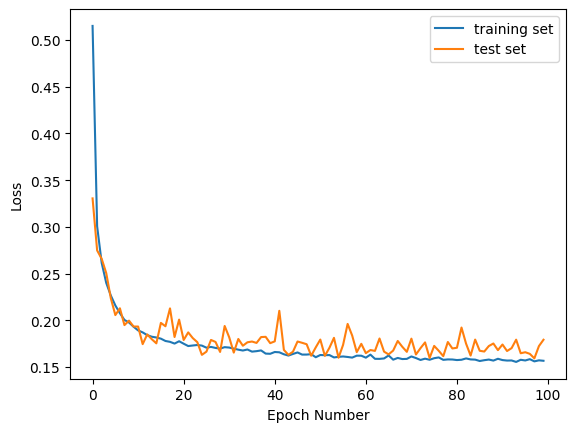

In [19]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

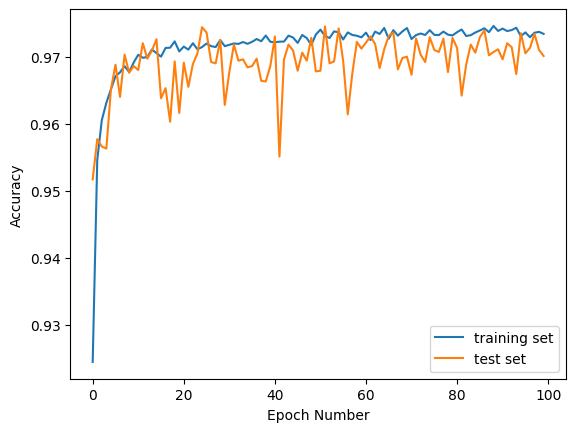

In [20]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

## Evaluate model accuracy

We need to compare the accuracy of our model on **training** set and on **test** set. We expect our model to perform similarly on both sets. If the performance on a test set will be poor comparing to a training set it would be an indicator for us that the model is overfitted and we have a "high variance" issue.

### Training set accuracy

In [21]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [22]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.1450251340866089
Training accuracy:  0.9798166751861572


### Test set accuracy

In [23]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [24]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.1791379749774933
Validation accuracy:  0.9700999855995178


## Save the model

We will save the entire model to a `HDF5` file. The `.h5` extension of the file indicates that the model should be saved in Keras format as HDF5 file. To use this model on the front-end we will convert it (later in this notebook) to Javascript understandable format (`tfjs_layers_model` with .json and .bin files) using [tensorflowjs_converter](https://www.tensorflow.org/js/tutorials/conversion/import_saved_model) as it is specified in the [main README](https://github.com/trekhleb/machine-learning-experiments).

In [25]:
model_name = 'digits_recognition_mlp.h5'
model.save(model_name, save_format='h5')

In [26]:
loaded_model = keras.models.load_model(model_name)

## Use the model (do predictions)

To use the model that we've just trained for digits recognition we need to call `predict()` method.

In [27]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

  1/313 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step


In [28]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


Each prediction consists of 10 probabilities (one for each number from `0` to `9`). We need to pick the digit with the highest probability since this would be a digit that our model most confident with.

In [29]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,1.577939e-07,9.542090e-07,1.289827e-05,1.019575e-05,3.374274e-08,6.612133e-07,7.481086e-12,9.999253e-01,1.432969e-07,4.968727e-05
1,3.585311e-08,3.139597e-05,9.991054e-01,8.547679e-04,3.277525e-09,1.864244e-08,2.189090e-09,4.963761e-06,3.443590e-06,2.453139e-09
2,2.283486e-06,9.968405e-01,1.474067e-04,3.621703e-05,5.352895e-04,4.728351e-05,5.412454e-05,1.426625e-03,8.786361e-04,3.157105e-05
3,9.927467e-01,2.641965e-07,1.661130e-04,3.050603e-05,1.739844e-04,4.658306e-06,6.624410e-03,1.733547e-04,1.209854e-05,6.798437e-05
4,4.750146e-06,1.257346e-06,1.366507e-05,8.128548e-07,9.982414e-01,1.123132e-06,2.047856e-06,9.053769e-05,2.618591e-06,1.641809e-03
...,...,...,...,...,...,...,...,...,...,...
9995,2.425793e-09,4.799486e-05,9.994387e-01,2.185622e-04,8.421134e-11,1.031366e-09,2.211613e-10,2.678565e-04,2.685495e-05,5.508861e-10
9996,1.889054e-09,6.231142e-05,6.134876e-05,9.992135e-01,7.438039e-09,3.034412e-04,1.558351e-13,4.281733e-06,1.407985e-05,3.411123e-04
9997,1.347780e-10,9.893598e-07,9.798016e-10,1.531648e-08,9.999717e-01,1.621424e-08,1.621015e-09,8.963128e-06,1.324709e-08,1.832617e-05
9998,4.195713e-06,1.378934e-09,1.014578e-08,7.425826e-05,4.807141e-11,9.995229e-01,1.592034e-05,1.213065e-05,3.706054e-04,7.532513e-09


In [30]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


So our model is predicting that the first example from the test set is `7`.

In [31]:
print(predictions[0])

7


Let's print the first image from a test set to see if model's prediction is correct.

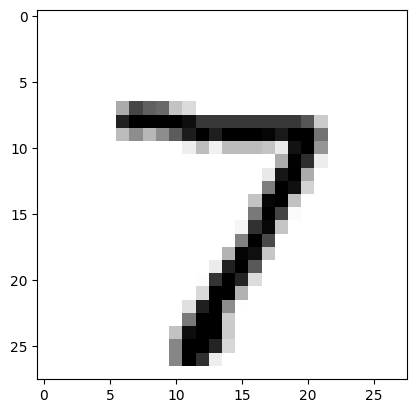

In [32]:
plt.imshow(x_test_normalized[0], cmap=plt.cm.binary)
plt.show()

We see that our model made a correct prediction and it successfully recognized digit `7`. Let's print some more test examples and correspondent predictions to see how model performs and where it does mistakes.

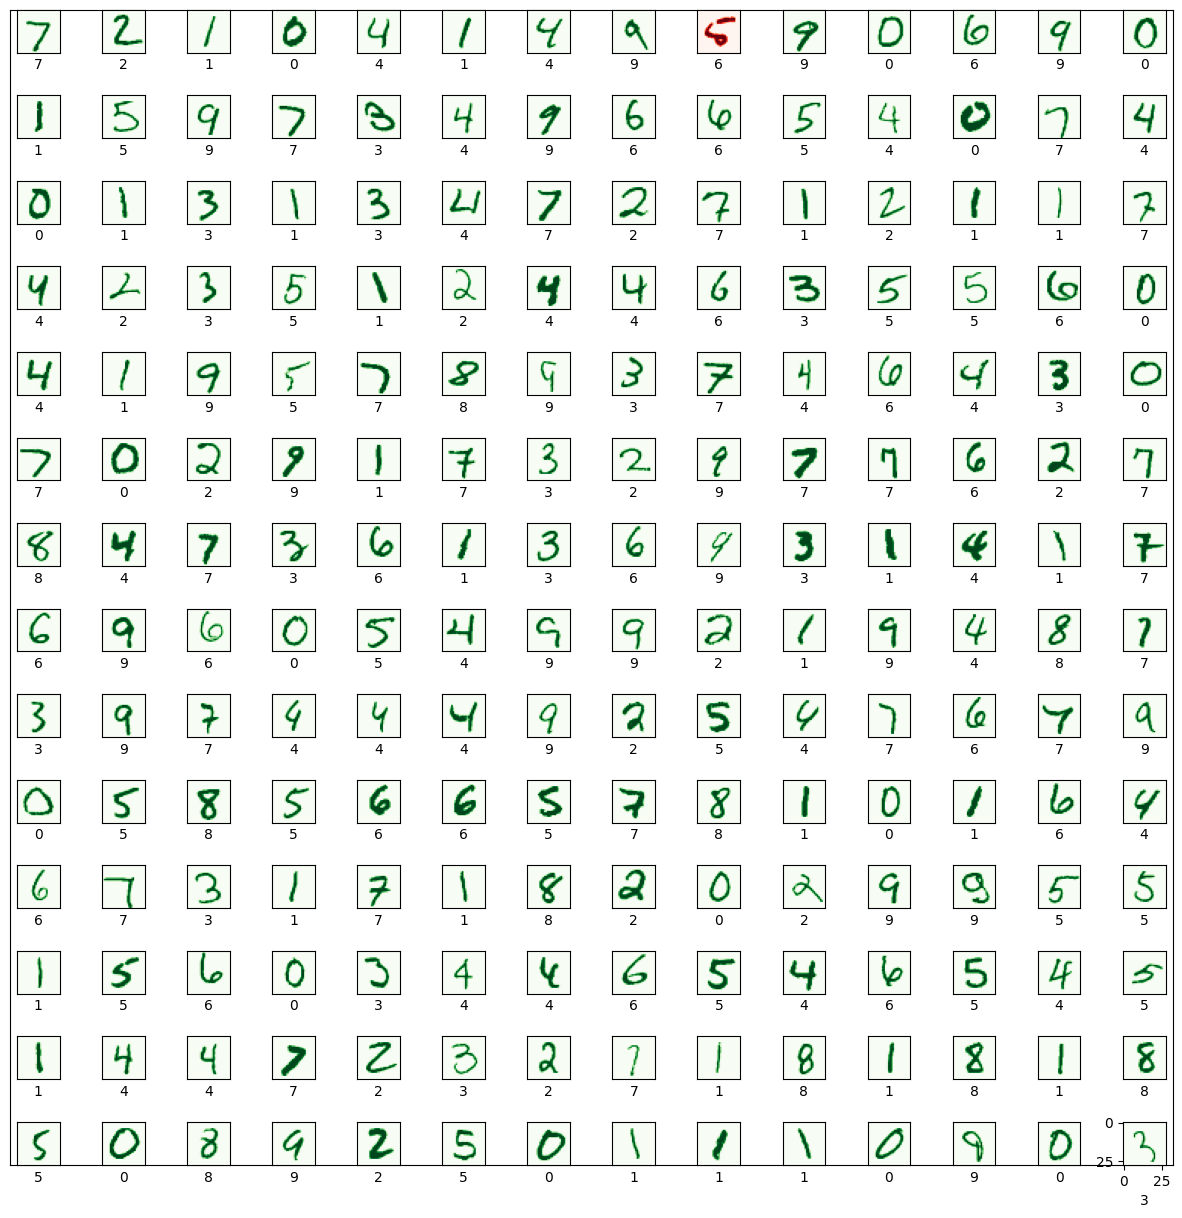

In [33]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index], cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

## Plotting a confusion matrix

[Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) shows what numbers are recognized well by the model and what numbers the model usually confuses to recognize correctly. You may see that the model performs really well but sometimes (28 times out of 10000) it may confuse number `5` with `3` or number `2` with `3`.

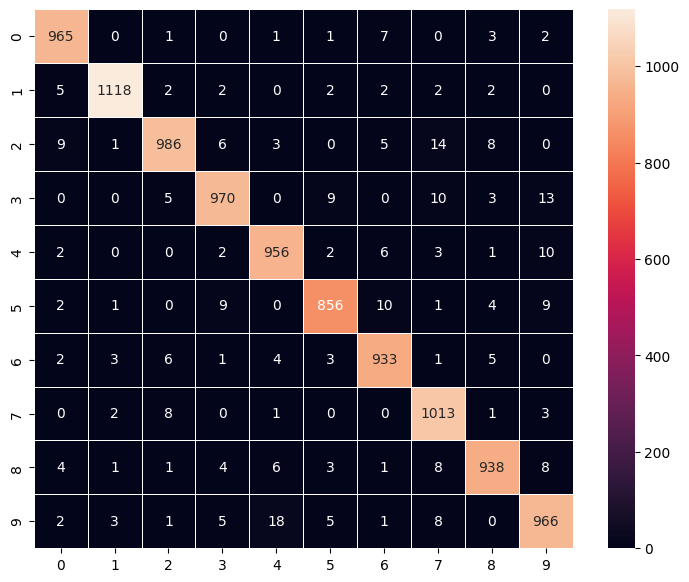

In [34]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

## Debugging the model with TensorBoard

[TensorBoard](https://www.tensorflow.org/tensorboard) is a tool for providing the measurements and visualizations needed during the machine learning workflow. It enables tracking experiment metrics like loss and accuracy, visualizing the model graph, projecting embeddings to a lower dimensional space, and much more.

In [35]:
%tensorboard --logdir .logs/fit

Reusing TensorBoard on port 6006 (pid 2232), started 6:43:13 ago. (Use '!kill 2232' to kill it.)

## Converting the model to web-format

To use this model on the web we need to convert it into the format that will be understandable by [tensorflowjs](https://www.tensorflow.org/js). To do so we may use [tfjs-converter](https://github.com/tensorflow/tfjs/tree/master/tfjs-converter) as following:

```
tensorflowjs_converter --input_format keras \
  ./experiments/digits_recognition_mlp/digits_recognition_mlp.h5 \
  ./demos/public/models/digits_recognition_mlp
```

You find this experiment in the [Demo app](https://trekhleb.github.io/machine-learning-experiments) and play around with it right in you browser to see how the model performs in real life.